In [2]:
import numpy as np
import matplotlib.pyplot as plt
class neighboors():
    def __init__(self,Id,distance):
        self.Id = Id
        self.distance = distance

class Data_point():
    def __init__(self,Id,timeSerie,distances) :
        self.visited = 0
        self.Id = Id
        self.clust_id = None
        self.timeSerie = timeSerie
        self.distances = sorted(distances, key = lambda neigh : neigh.distance)
        #self.isCorePt = False
        self.inRange = []
        self.label = None

    def inRangeNeigh(self , eps , min_pts ) :
        cpt = 1
        for elem in self.distances :
            if (elem.distance <= eps) :
                self.inRange.append(elem)
                cpt += 1
            else :
                break
        return cpt
    
class DbCluster() : 
    def __init__(self,id) :
        self.id = id
        self.Cseries = []
    def addSerie(self , Data_point ) :
        Data_point.clust_id = self.id
        self.Cseries.append(Data_point.timeSerie)
    
#add id in dist list
class TimeSerieDbScan() :
    def __init__(self,DistMatrix,eps,min_pts):
        self.DistMatrix = DistMatrix
        self.Distances_list = []
        self.clusters = []
        self.eps = eps
        self.min_pts = min_pts
        self.DataSet = []
        self.Noise = []


    def BuildDistances (self) :
        for i in range(0,len(self.DistMatrix)) : 
            neigh = []
            for j in range (i+1,len(self.DistMatrix)) :
               neigh.append(neighboors(j,self.DistMatrix[i][j]))
            for j in range(0,i):
                neigh.append(neighboors(j,self.DistMatrix[j][i]))
            self.Distances_list.append(neigh)
        

    def  BuildDataPts(self,series):
        id = 0
        for elem in self.Distances_list :
            self.DataSet.append(Data_point(id,series[id],elem))
            id += 1

    
    def expand_cluster(self,point,clust):
        clust.addSerie(point)
        point.label = 'Clustered'
        i = 0 
        condition = i < len(point.inRange)
        while condition :
            p = point.inRange[i]
            if self.DataSet[p.Id].visited == False :
                
                self.DataSet[p.Id].visited = True
                if self.DataSet[p.Id].inRangeNeigh(self.eps,self.min_pts) >= self.min_pts : 
                    point.inRange = point.inRange + self.DataSet[p.Id].inRange
                    clust.addSerie(self.DataSet[p.Id])
            else :
                if self.DataSet[p.Id].label == 'Noise' :
                    self.DataSet[p.Id].label = 'Clustered'
                    clust.addSerie(self.DataSet[p.Id])
            i += 1
            condition = i < len(point.inRange)

    def fit(self,series) :
        self.BuildDistances()
        self.BuildDataPts(series)
        clustID = 0
        for p in self.DataSet : 
            if p.visited == False : 
                p.visited = True
                if p.inRangeNeigh(self.eps,self.min_pts) < self.min_pts :
                    p.label = 'Noise'
                else :
                    newClust = DbCluster(clustID)
                    self.expand_cluster(p,newClust)
                    self.clusters.append(newClust)
                    clustID +=1
        for p in self.DataSet : 
            if p.label == 'Noise' :
                self.Noise.append(self.DataSet[p.Id])
        

def log(show, data):
        if show:
            print(data)

3
0
15


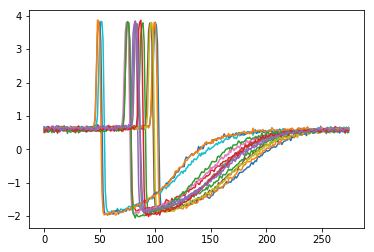

9


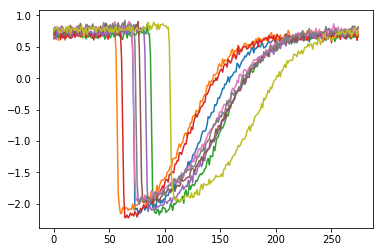

16


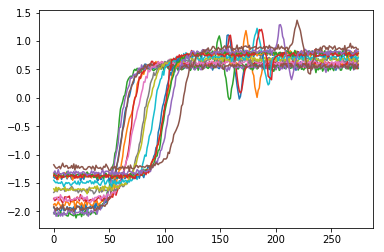

In [7]:
series = np.genfromtxt("series_trace.csv",delimiter=",")
DistMatrix = np.genfromtxt("dist_matrix_trace.csv",delimiter=",")
eps = 3
min_pts = 2
model = TimeSerieDbScan(DistMatrix,eps,min_pts)
model.fit(series)
print(len(model.clusters))
print(len(model.Noise))
for ss in model.clusters :
    print(len(ss.Cseries))
    for s in ss.Cseries :
        plt.plot(s)
    plt.show()


In [5]:
series.shape

(40, 275)

In [14]:
import pandas as pd

In [15]:
Computers= pd.read_csv("C:/Users/ELAM/Computers_TRAIN")

In [16]:
ComputersDS = list()
for i in range(len(Computers)):
    ComputersDS.append(Computers.iloc[i])
Computer = np.array(ComputersDS)

In [220]:
DistMatrix1 = np.genfromtxt("dist_matrix_gun.csv",delimiter=",")

In [221]:
DistMatrix1.shape

(50, 50)

In [222]:
Gun = np.genfromtxt("series_gun.csv", delimiter= "," )

In [223]:
Gun.shape

(50, 150)

3
5
19


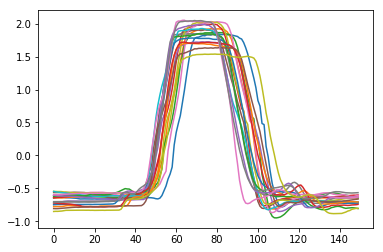

8


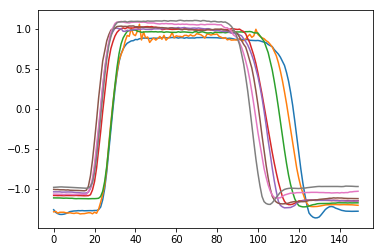

13


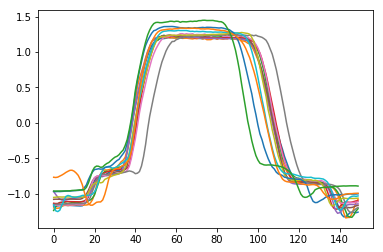

In [273]:
eps1 = 5
min_pts1 = 4
model_gun = TimeSerieDbScan(DistMatrix1,eps1,min_pts1)
model_gun.fit(Gun)
print(len(model_gun.clusters))
print(len(model_gun.Noise))
plt.figure()
for sq in model_gun.clusters :
    print(len(sq.Cseries))
    for s in sq.Cseries :
        plt.plot(s)
    plt.show()

eps =1.8000000000000005
5
19
72


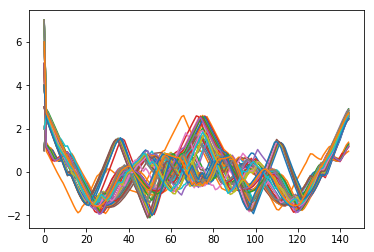

3


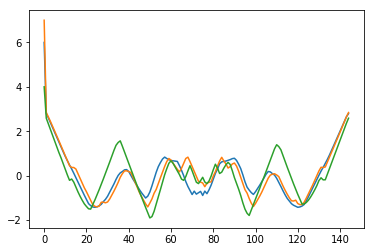

2


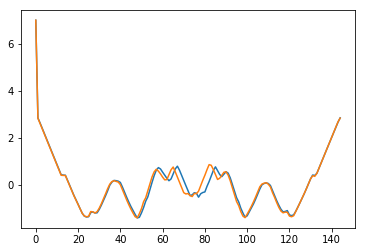

2


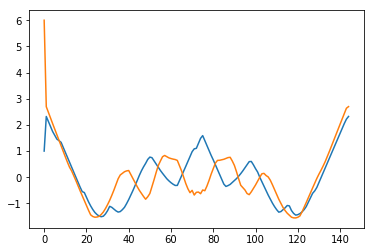

2


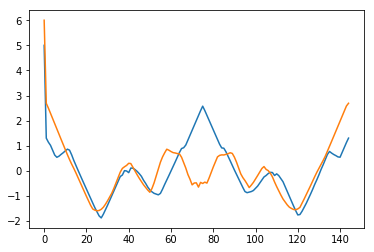

In [114]:
eps = 1.8000000000000005
min_pts = 2
model_ECG = TimeSerieDbScan(DistMatrix,eps,min_pts)
model_ECG.fit(Plane)
print("eps ="+ str(eps) )
print(str(len(model_ECG.clusters)))
print(len(model_ECG.Noise))

plt.figure()
for ss in model_ECG.clusters :
    print(len(ss.Cseries))
    for s in ss.Cseries :
        plt.plot(s)
    plt.show()

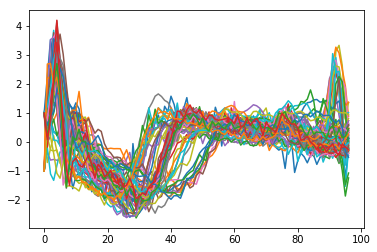

In [72]:
plt.figure()
for s in model_ECG.Noise :
    plt.plot(s.timeSerie)

In [129]:
GunDistance =  np.genfromtxt("C:/Users/ELAM/Gun_dist_matrix_Soft.csv", delimiter = ',')

In [151]:
GunDistance.shape

(50, 50)

In [143]:
Gun = np.genfromtxt("C:/Users/ELAM/Gun_DS.csv", delimiter = ',')

In [152]:
Gun.shape

(50, 150)

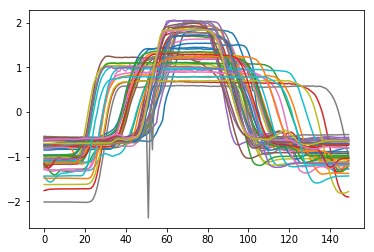

In [144]:
plt.figure()
for s in Gun :
    plt.plot(s)

In [147]:
print(Gun[49])

[-1.4357    -1.4323    -1.4329    -1.4316    -1.4326    -1.4323
 -1.4335    -1.4324    -1.4333    -1.43      -1.4297    -1.4291
 -1.4293    -1.4267    -1.4267    -1.4238    -1.4258    -1.4262
 -1.426     -1.4103    -1.3346    -1.2089    -1.0004    -0.75366
 -0.46417   -0.19393    0.0021544  0.25183    0.40864    0.54003
  0.62456    0.68736    0.71154    0.7364     0.73681    0.74539
  0.74814    0.7526     0.77412    0.7749     0.77177    0.78379
  0.78556    0.78829    0.79079    0.78666    0.78843    0.7867
  0.7886     0.79457    0.78568    0.78785    0.79121    0.78589
  0.78513    0.79322    0.79275    0.78998    0.79245    0.79109
  0.79156    0.79274    0.79131    0.7936     0.79335    0.78447
  0.78341    0.78524    0.79024    0.78084    0.78167    0.78368
  0.786      0.78779    0.78659    0.78636    0.78636    0.78452
  0.78311    0.77928    0.77862    0.77801    0.78166    0.78582
  0.78771    0.78849    0.78702    0.78495    0.78601    0.78821
  0.78474    0.78613    0.780

In [159]:
eps = 1
min_pts = 2
model_Gun = TimeSerieDbScan(GunDistance,eps,min_pts)
model_Gun.fit(Gun)
print(str(len(model_Gun.clusters)))
print(len(model_Gun.Noise))

plt.figure()
for ss in model_Gun.clusters :
    print(len(ss.Cseries))
    for s in ss.Cseries :
        plt.plot(s)
    plt.show()

100


IndexError: index 50 is out of bounds for axis 0 with size 50